# Оглавление

1. [Часть 1. Приоритизация гипотез](#part_1)
2. [Часть 2. Анализ A/B-теста](#part_2)
    * [1. Кумулятивная выручка по группам](#task1)
    * [2. Кумулятивный средний чек по группам](#task2)
    * [3. Относительное изменение кумулятивного среднего чека группы B к группе A](#task3)
    * [4. Кумулятивная конверсия](#task4)
    * [5. Относительное изменение кумулятивной конверсии группы B к группе A](#task5)
    * [6. Количество заказов по пользователям](#task6)
    * [7. 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей](#task7)
    * [8. Стоимость заказов](#task8)
    * [9. 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов](#task9)
    * [10. Cтатистическая значимость различий в конверсии между группами по «сырым» данным](#task10)
    * [11. Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#task11)
    * [12. Cтатистическая значимость различий в конверсии между группами по «очищенным» данным](#task12)
    * [13. Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#task13)
    
    
3. [Выводы](#conclusions)

## Часть 1. Приоритизация гипотез <a id="part_1"></a>

В файле */datasets/hypothesis.csv* находятся 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами <code>Reach</code>, <code>Impact</code>, <code>Confidence</code>, <code>Effort</code>

**Задача**

* Применить фреймворк <code>ICE</code> для приоритизации гипотез
* Применить фреймворк <code>RICE</code> для приоритизации гипотез
* Объяснить как изменилась приоритизация гипотез и почему так произошло

### Решение

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math as mth
from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('datasets/hypothesis.csv')

Определим ф-ию <code>data_info()</code>, которая будет возвращать общую информацию о датасете и 5 его рандомных строк

In [3]:
def data_info(data):
    print(data.info())
    return data.sample(5)

С помощью <code>data_info()</code> взглянем на датасет <code>hypothesis</code>

In [4]:
data_info(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6


Где

* <code>Hypothesis</code> — краткое описание гипотезы;
* <code>Reach</code> — охват пользователей по 10-балльной шкале;
* <code>Impact</code> — влияние на пользователей по 10-балльной шкале;
* <code>Confidence</code> — уверенность в гипотезе по 10-балльной шкале;
* <code>Efforts</code> — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

В датасете содержится информация о 9 гипотезах по увеличению выручки интернет-магазина с указанными параметрами: <code>Reach</code>, <code>Impact</code>, <code>Confidence</code>, <code>Effort</code>. С помощью методов <code>ICE</code> и <code>RICE</code> вычислим приоритетность гипотез

In [5]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

Результат приоритезации <code>ICE</code>

In [6]:
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).head()

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000


Результат приоритезации <code>RICE</code>

In [7]:
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).head()

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2


Результаты работы 2ух методов разные: для метода <code>ICE</code> ТОП-3 гипотез с индексами 8, 0 и 7, а для <code>RICE</code> 7, 2 и 0. Связано это с параметром <code>Reach</code> в методе <code>RICE</code>, который определяет кол-во пользователей, которых затронет вносимое изменение. Добавление этого параметра в вычисление приоритета и приводит к различным результатам приоритезации

Какую из гипотез проверять следующей - зависит от метода, который применяет компания для приоритезации гипотез: если учет затрагиваемых пользователей необходим, то стоит использовать метод <code>RICE</code>, если нет - <code>ICE</code>

## Часть 2. Анализ A/B-теста <a id="part_2"></a>

В файлах */datasets/orders.csv* и */datasets/visitors.csv* результаты A/B-теста

**Задача**

Проанализировать A/B-тест:
* Построить кумулятивные графики: выручки, среднего чека, конверсии по группам. Сделать выводы и предположения
* Обнаружить и удалить "аномальные" данные, если они есть. Выбрать границы "аномальности"
* Определить наличие статистически значимых различий между группами различных показателей
* Принять решение по результатам теста и объяснить его

### Решение

В нашем распоряжении есть результаты некоторого A/B теста. Перед тем, как приступить к анализу, необходимо получить ответы на следующие вопросы:

* Точно ли не тестировалась аналогичная гипотеза? (Лучше, конечно, узнать об этом перед тестом :)
* Проводился ли A/A тест перед A/B тестом, правильно ли передавались данные в систему аналитики, т.е. не попадали ли одни и те же пользователи в несколько анализируемых групп, и правильно ли было выполнено разделение пользователей на равные группы?
* Каким образом был выбран интервал времени проведения A/B тестирования?

Очень важным вопросом является вопрос определения интервала анализа. Предварительно необходимо определить метрику/набор метрик, на основе которых будет принято решение об успешности теста. Затем определить методологию принятия решения - какой уровень исследумых метрик сейчас, какое различие хотим зафиксировать, какие уровни статистической значимости и мощности теста нас устроят. На основе этих данных определяется длительность теста и **способ проверки результата**

К сожалению получить ответы на все вопросы в рамках проекта невозможно, однако на некоторые из них постараемся получить ответ самостоятельно

Считаем файлы с результатами проверки гипотезы

In [8]:
orders = pd.read_csv('datasets/orders.csv')
visitors = pd.read_csv('datasets/visitors.csv')

Взглянем на <code>orders</code> и <code>visitors</code> с помощью <code>data_info</code>

In [9]:
data_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
1179,339489775,1064078146,2019-08-14,1190,A
321,1775445570,3118528100,2019-08-19,1090,A
14,3859315276,1565034404,2019-08-15,10980,A
464,2854869852,586100578,2019-08-26,1790,B
786,1507038921,1011231197,2019-08-07,3190,A


Где для таблицы <code>orders</code>

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

In [10]:
data_info(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
48,2019-08-18,B,737
43,2019-08-13,B,769
30,2019-08-31,A,699
35,2019-08-05,B,707
56,2019-08-26,B,676


Где для таблицы <code>visitors</code>

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

**Выводы**

* Таблица <code>orders</code> содержит 1197 записей о покупках пользователей интернет-магазина
* Таблица <code>visitors</code> содержит 62 записи о кол-ве посетителей анализируемой группы в определенный день
* Даты в обеих таблицах необходимо преобразовать к типу datetime64

Выполним необходимые преобразования и более детально взглянем на исследуемые датасеты

**Преобразуем дату заказов и визитов к типу datetime64**

In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

**Проверим словарь групп в каждой таблице**

In [12]:
print(orders['group'].unique().tolist())
print(visitors['group'].unique().tolist())

['B', 'A']
['A', 'B']


Анализуремых групп 2 в каждой таблице, это радует :)

**Проверим принадлежность пользователей только 1ой исследуемой группе**

Сгруппируем таблицу <code>orders</code> по уникальному идентификатору пользователя и найтем только тех, кол-во анализируемых групп для которых не равно 1

In [13]:
(orders.groupby('visitorId')['group'].nunique() != 1).reset_index()['group'].sum()

58

Таких пользователей окалазось 58. Их стоит исключить из результатов анализа. Не совсем понимаю как быть с визитами: в моём понимании **следует также удалить информацию о визитах этих пользователей**, но в рамках этой задачи этого сделать не удастся, т.к. таблица <code>visitors</code> не содержит информации о пользователях :(

Исключим найденых пользователей из таблицы <code>orders</code>

In [14]:
orders = orders.merge(
    (orders.groupby('visitorId')['group'].nunique() == 1).reset_index().query('group == True')[['visitorId']],
    on='visitorId',
    how='inner'
)

orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1015
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Число записей в таблице <code>orders</code> уменьшилось с 1197 до 1016

**Проверим датасеты на наличие явных дублей**

In [15]:
visitors.duplicated().sum()

0

In [16]:
orders.duplicated().sum()

0

Явные дубли отсутствуют

**Проверим равномерность разделения пользователей на группы**

Т.к. в работе необходимо изучать абсолютные метрики, то необходимо разделять пользователей на равные группы. Проверим общее кол-во пользователей, попавших в группы A и B

In [17]:
visitors.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

In [18]:
round(abs(
    visitors.query('group == "B"')['visitors'].sum() / visitors.query('group == "A"')['visitors'].sum() - 1
) * 100, 2)

0.96

Различия в группах не превышают 1% - общее разделение на группы выполено верно

**Определим диапазон дат в <code>orders</code> и <code>visitors</code>**

Для этого определим ф-ию, которая будет выводить максимальное и минимальное значения указанного столбца в датасете

In [19]:
def min_max_func(data, column):
    print(data[column].min())
    print(data[column].max())

Диапазон анализируемых дат в <code>orders</code>

In [20]:
min_max_func(orders, 'date')

2019-08-01 00:00:00
2019-08-31 00:00:00


Диапазон анализируемых дат в <code>visitors</code>

In [21]:
min_max_func(visitors, 'date')

2019-08-01 00:00:00
2019-08-31 00:00:00


Диапазоны дат совпадают, данные о визитах и заказах собраны за август 2019. Перейдем к решению задачи!

### 1. Кумулятивная выручка по группам <a id="task1"></a>

Перед выполнением задачи подготовим данные к анализу:

Вычислим дневное кол-во визитов группы A

In [22]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


Вычислим дневное кол-во визитов группы B

In [23]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


Вычислим кумулятивное кол-во визитов группы A

In [24]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}),
    axis=1
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


И группы B

In [25]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}),
    axis=1
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Вычислим дневные кол-во заказов и выручку для группы A

In [26]:
ordersADaily = (
    orders[orders['group']=='A'][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


И для группы B

In [27]:
ordersBDaily = (
    orders[orders['group']=='B'][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


Осталось определить кумулятивные кол-во заказов и выручку для групп A и B

In [28]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {
            'date' : 'max',
            'ordersPerDateA' : 'sum',
            'revenuePerDateA' : 'sum'
        }), axis=1
).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


In [29]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {
            'date' : 'max',
            'ordersPerDateB' : 'sum',
            'revenuePerDateB' : 'sum'
        }), axis=1
).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


Объединим полученные таблицы в <code>data</code>

In [30]:
data = (
    ordersADaily.merge(ordersBDaily, on='date', how='left')
    .merge(ordersACummulative, on='date', how='left')
    .merge(ordersBCummulative, on='date', how='left')
    .merge(visitorsADaily, on='date', how='left')
    .merge(visitorsBDaily, on='date', how='left')
    .merge(visitorsACummulative, on='date', how='left')
    .merge(visitorsBCummulative, on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Отлично, данные готовы, перейдем к построению графика кумулятивной выручки. Для этого определим ф-ию <code>line_graph_func</code> для построения линейных графиков

In [31]:
# data - dictionary with plot data. Format: label - data
def line_graph_func(data_x, data_y={}, title='', xlabel='', ylabel='', ylim=(), grid=True, legend=True, axhline=False):
    plt.figure(figsize=(13, 9))
    
    for dt in data_y:
        plt.plot(data_x, data_y[dt], label=dt)
        
    plt.title(title)
    plt.xlim(data_x.min(), data_x.max())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if ylim:
        plt.ylim(ylim)
    
    plt.grid(True)
    
    if legend:
        plt.legend()
        
    if axhline:
        plt.axhline(y=0, color='black', linestyle='--')
        
    plt.show()

В ф-ию передадим столбцы <code>date</code>, <code>revenueCummulativeA</code>, <code>revenueCummulativeB</code> таблицы <code>data</code> в нужном формате, а также укажем необходимую мета-информацию графика

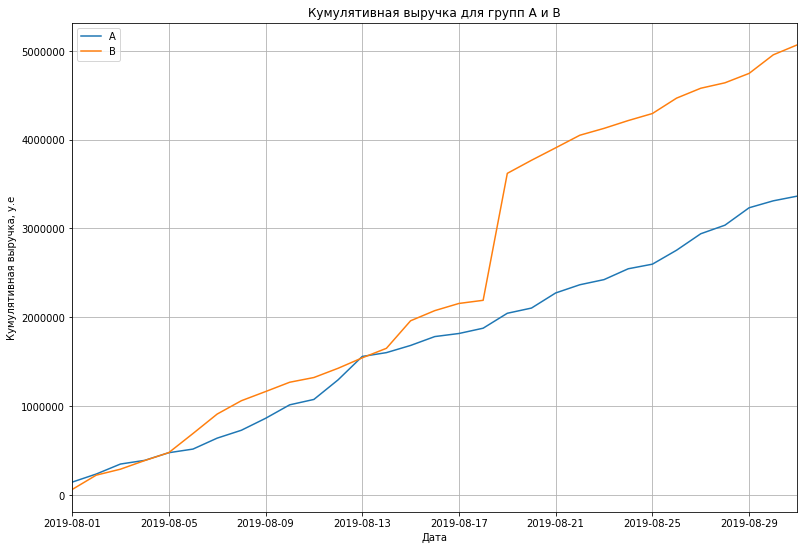

In [32]:
line_graph_func(
    data['date'],
    {'A':data['revenueCummulativeA'], 'B':data['revenueCummulativeB']},
    'Кумулятивная выручка для групп A и B',
    'Дата',
    'Кумулятивная выручка, у.е'
)

**Выводы**

* Кумулятивная выручка почти равномерно увеличивается в течение всего теста для группы A
* Кумулятивная выручка для группы B скачкообразно возрастает 19.08.2019. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке! Необходимо удалить аномалии и проанализировать поведение зависимости по "очищенным" данным

### 2. Кумулятивный средний чек по группам <a id="task2"></a>

Построим график кумулятивного среднего чека по группам: в качестве данных будем передавать отношение кумулятивной выручки к кумулятивному кол-ву заказов каждой группы

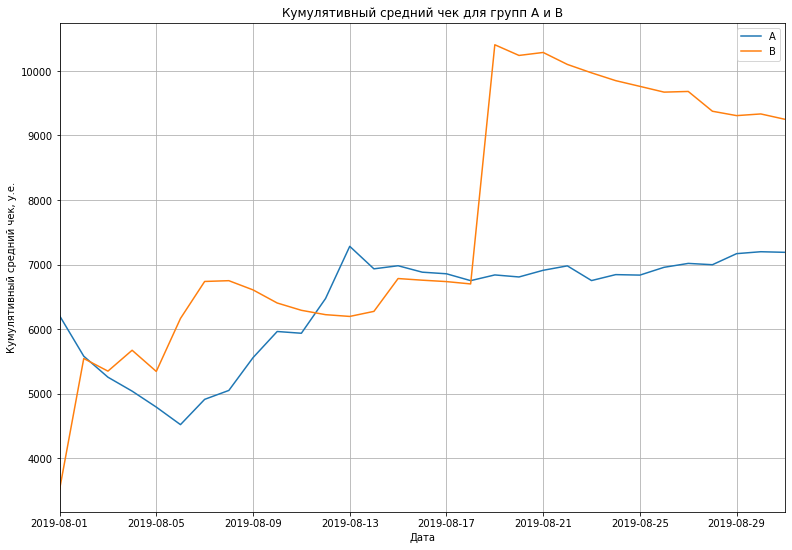

In [33]:
line_graph_func(
    data['date'],
    {'A':data['revenueCummulativeA']/data['ordersCummulativeA'], 'B':data['revenueCummulativeB']/data['ordersCummulativeB']},
    'Кумулятивный средний чек для групп A и B',
    'Дата',
    'Кумулятивный средний чек, у.е.'
)

**Выводы**

* Кумулятивный средний чек группы A к концу эксперимента практически установился и стал равномерным в районе 7 000 y.e.
* Кумулятивный средний чек группы B не установился - 19.08.2019 заметен всплеск среднего чека, что сигнализирует о совершении **крупных заказов в этот день** (нашли причину всплеска выручки)
* Для проверки установления среднего чека и качественного сравнения 2ух групп необходимо удалить крупные заказы из выборки B

### 3. Относительное изменение кумулятивного среднего чека группы B к группе A <a id="task3"></a>

Построим график относительного изменения кумулятивного среднего чека группы B к группе A

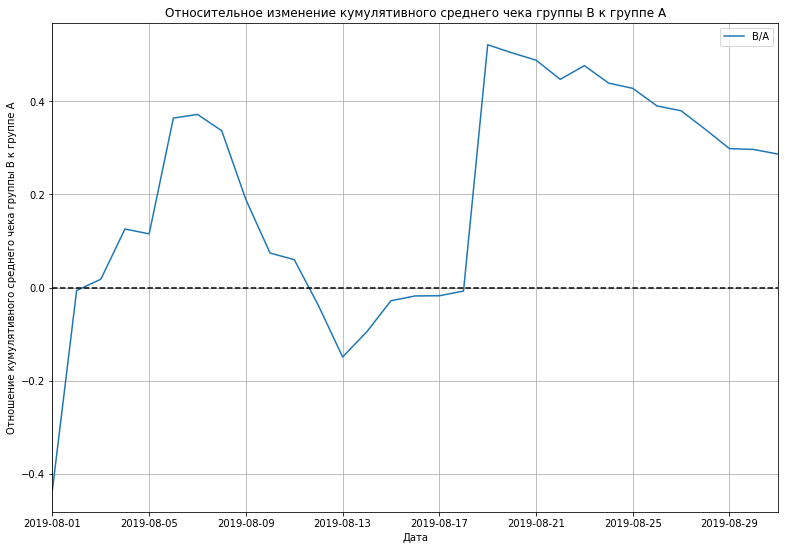

In [34]:
line_graph_func(
    data['date'],
    {'B/A':(data['revenueCummulativeB'] / data['ordersCummulativeB'])/(data['revenueCummulativeA'] / data['ordersCummulativeA']) - 1},
    'Относительное изменение кумулятивного среднего чека группы B к группе A',
    'Дата',
    'Отношение кумулятивного среднего чека группы B к группе A',
    axhline=True
)

**Выводы**

* До 19.08.2019 кумулятивный средний чек групп A и B колебался, а после в группе B были совершены крупные покупки, которые повлияли на итоговый результат. Стоит удалить крупные заказы и проанализировать "очищенные" данные, чтобы сделать окончательный вывод относительно кумулятивного среднего чека

### 4. Кумулятивная конверсия <a id="task4"></a>

Построим график кумулятивной конверсии: отношение кумулятивных заказов группы к кумулятивному числу визитов

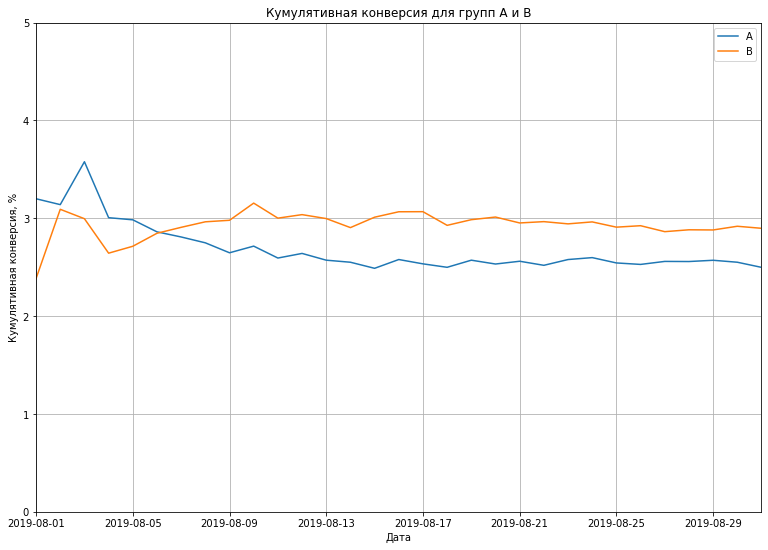

In [35]:
line_graph_func(
    data['date'],
    {'A':(data['ordersCummulativeA']/data['visitorsCummulativeA'])*100, 'B':(data['ordersCummulativeB']/data['visitorsCummulativeB'])*100},
    'Кумулятивная конверсия для групп A и B',
    'Дата',
    'Кумулятивная конверсия, %',
    ylim=(0, 5)
)

**Выводы**

* Для обеих групп кумулятивная конверсия установилась
* Группа A стабильно хуже по накопленной конверсии относительно группы B
* Статистическая значимость различий 2ух групп будет проанализирована далее

### 5. Относительное изменение кумулятивной конверсии группы B к группе A <a id="task5"></a>

Построим график относительного изменения кумулятивной конверсии группы B к группе A

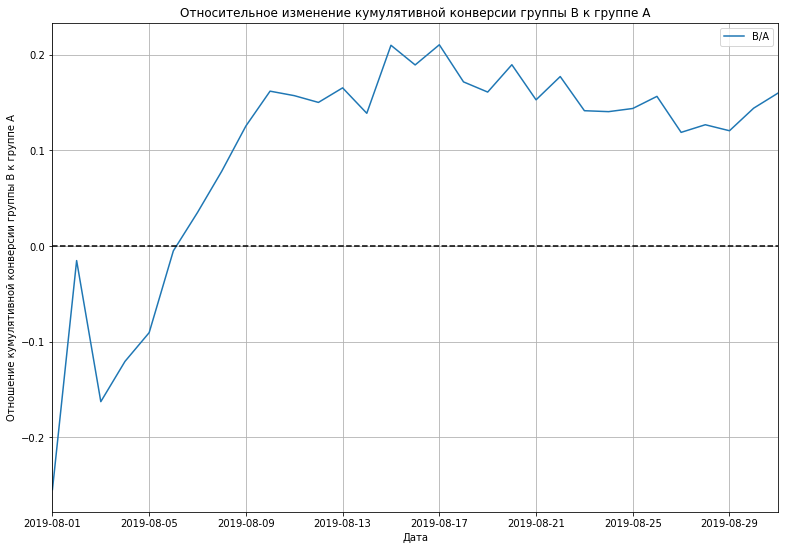

In [36]:
line_graph_func(
    data['date'],
    {'B/A':(data['ordersCummulativeB']/data['visitorsCummulativeB'])/(data['ordersCummulativeA']/data['visitorsCummulativeA'])-1},
    'Относительное изменение кумулятивной конверсии группы B к группе A',
    'Дата',
    'Отношение кумулятивной конверсии группы B к группе A',
    axhline=True
)

**Выводы**

* Группа A стабильно хуже по накопленной конверсии относительно группы B

### 6. Количество заказов по пользователям <a id="task6"></a>

Сгруппируем данные таблицы <code>orders</code> по пользовательским id и определим число заказов каждого пользователя

In [37]:
ordersByUsers = (
    orders
    .drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head()

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


Построим гистрограмму распределения количества заказов на одного пользователя

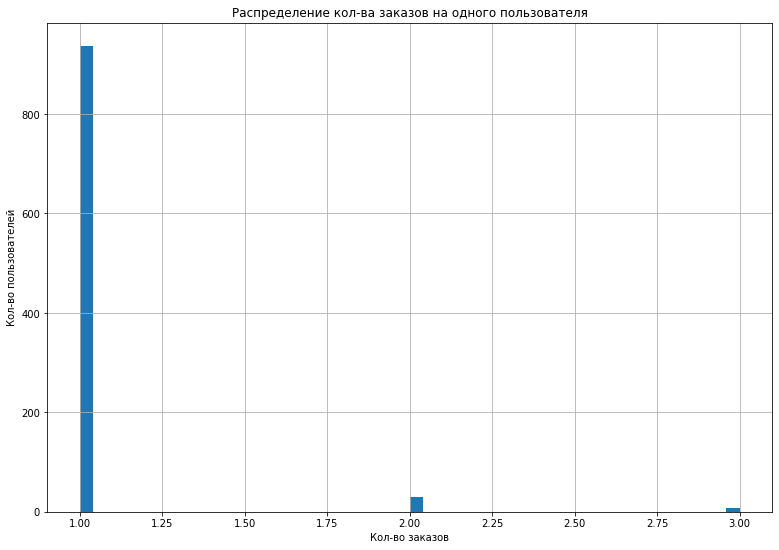

In [38]:
plt.figure(figsize=(13, 9))

# Строим распределение кол-ва заказов по пользователям
ordersByUsers['orders'].plot(kind='hist', bins=50)

plt.title('Распределение кол-ва заказов на одного пользователя')
plt.xlabel('Кол-во заказов')
plt.ylabel('Кол-во пользователей')
plt.grid(True)
plt.show()

Большинство покупателей заказывали только один раз. Построим точечную диаграмму числа заказов на одного пользователя

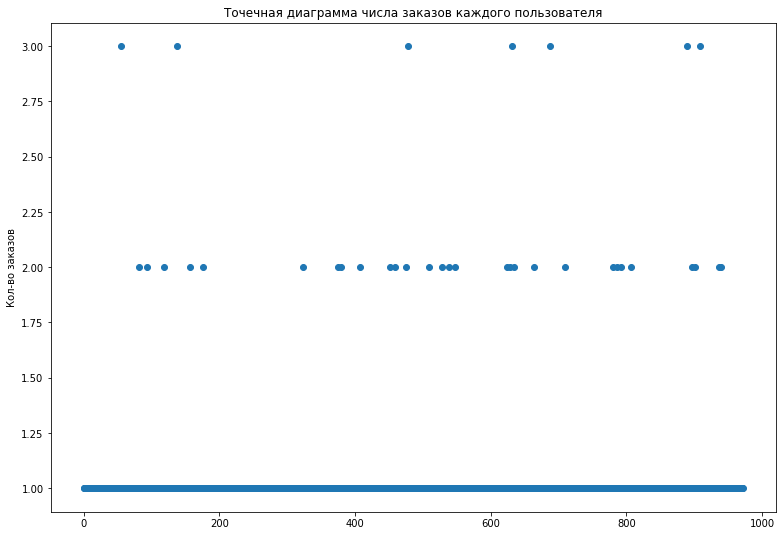

In [39]:
plt.figure(figsize=(13, 9))

plt.scatter(pd.Series(range(0, len(ordersByUsers))), ordersByUsers['orders'])

plt.title('Точечная диаграмма числа заказов каждого пользователя')
plt.ylabel('Кол-во заказов')
plt.show()

**Выводы**

* Большинство пользователей совершили 1 заказ за анализируемый период, в редких случаях - 2 или 3 в ещё более редких

### 7. 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей <a id="task7"></a>

Определим 95-й и 99-й прецентили кол-ва заказов на пользователя с помощью метода <code>percentile</code> библиотеки <code>numpy</code>

In [40]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


**Выводы**

* Не более 5% пользователей совершали более 1ой покупки
* Не более 1% пользователей соврешали более 2ух покупок
* Аномалий в данных не наблюдается. Возможно, что первичная очистка отбросила часть "частых" покупателей, данные о которых собирались неверно

### 8. Стоимость заказов <a id="task8"></a>

Построим распределение стоимости заказов

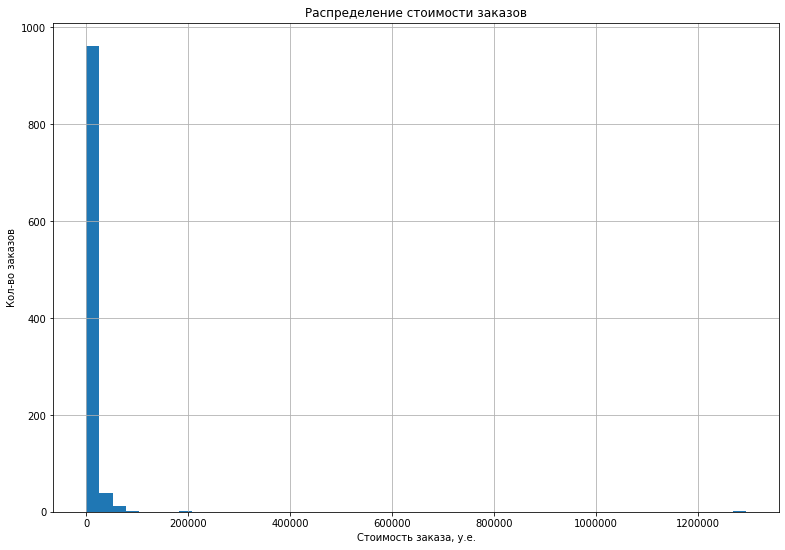

In [41]:
plt.figure(figsize=(13, 9))

orders['revenue'].plot(kind='hist', bins=50)

plt.title('Распределение стоимости заказов')
plt.xlabel('Стоимость заказа, y.e.')
plt.ylabel('Кол-во заказов')
plt.grid(True)
plt.show()

И до 100 000 y.e.

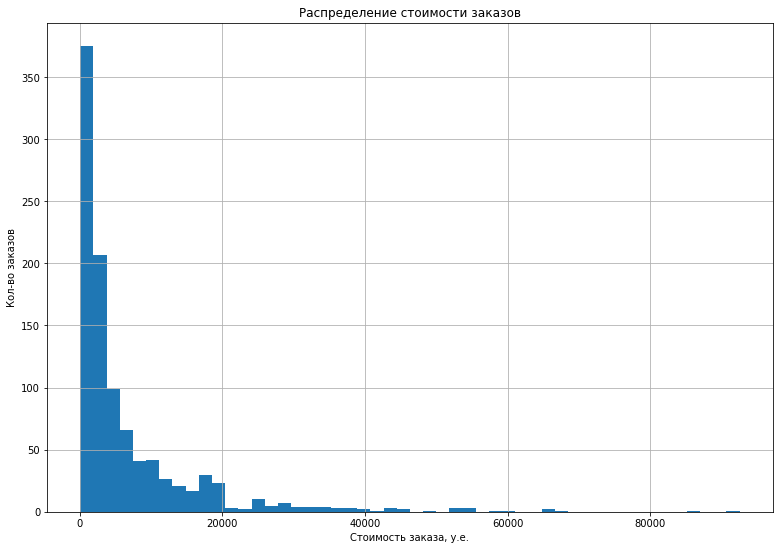

In [42]:
plt.figure(figsize=(13, 9))

orders.query('revenue < 100000')['revenue'].plot(kind='hist', bins=50)

plt.title('Распределение стоимости заказов')
plt.xlabel('Стоимость заказа, y.e.')
plt.ylabel('Кол-во заказов')
plt.grid(True)
plt.show()

Большинство заказов совершается на сумму, близкую к нескольким тысячам y.e. Построим точечную диаграмму стоимости заказов

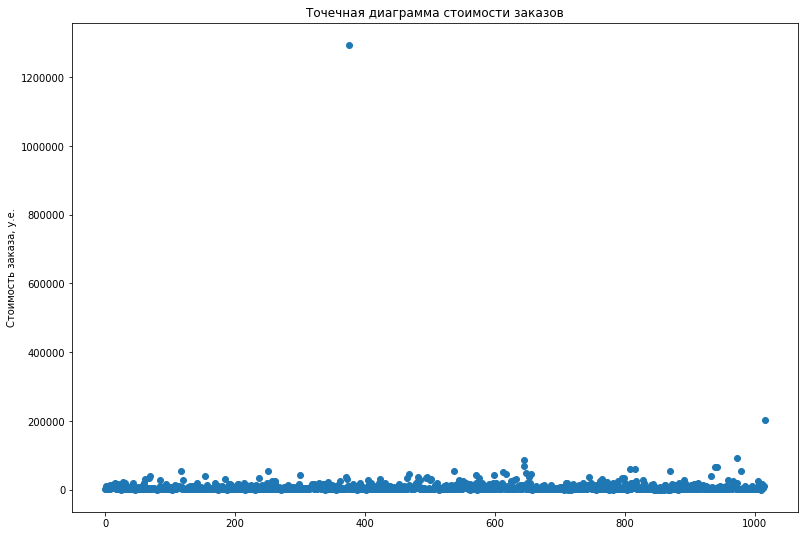

In [43]:
plt.figure(figsize=(13, 9))

plt.scatter(pd.Series(range(0, len(orders['revenue']))), orders['revenue'])

plt.title('Точечная диаграмма стоимости заказов')
plt.ylabel('Стоимость заказа, y.e.')
plt.show()

**Выводы**

* Стоимости средних заказов близки к нескольким тысячам y.e.
* В выборке присутствуют дорогие заказы, которые являются выбросами (как и предполагалось)

### 9. 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов <a id="task9"></a>

Определим 95-й и 99-й прецентили стоимости заказов

In [44]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


**Выводы и предположения**

* Не более 5% пользователей совершали заказ на сумму свыше 26 785 y.e.
* Не более 1% пользователей совершали заказ на сумму свыше 53 904 y.e.
* Верхней границей стоимости заказа при "очистке" данных разумно выбрать значение в 30 000 y.e.

### 10. Cтатистическая значимость различий в конверсии между группами по «сырым» данным <a id="task10"></a>

В данной задаче необходимо проверить гипотезу о равенстве долей: отношения покупок к визитам групп A и B

Предварительно перед проведением теста необхоимо выполнить проверку распределений <code>P₁ и P₂</code> на нормальность: центральная предельная теорема гласит, что выборочные средние будут нормально распределены вокруг настоящего среднего генеральной совокупности (а пропорции, взятые из выборок — вокруг пропорции). Без этой проверки нет оснований полагать, что в выборку не попали выбросы, которые существенно повлияют на результаты проверки

Для проверки распределения на нормальность применим критерий Шапиро-Уилка, встроенный в библиотеку <code>scipy.stats</code>, а саму проверку обернем в ф-ию <code>test_norm_func</code>

In [45]:
def test_norm_func(data={}, alpha = .05):
    for el in data:
        # проверяем распределение на нормальность
        results = st.shapiro(data[el])
        
        p_value = results[1]
        
        print('Результаты группы', el)
        print('p-value:', p_value)
        
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу: распределение НЕ нормально")
        else:
            print("Не получилось отвергнуть нулевую гипотезу: распределение нормально")

Приступим к проверке на нормальность распределений конверсий групп A и B по "сырым" данным

In [46]:
sample_A = data['ordersPerDateA'] / data['visitorsPerDateA']
sample_B = data['ordersPerDateB'] / data['visitorsPerDateB']

test_norm_func(
    {'A':sample_A, 'B':sample_B}
)

Результаты группы A
p-value: 0.05598486214876175
Не получилось отвергнуть нулевую гипотезу: распределение нормально
Результаты группы B
p-value: 0.7027069926261902
Не получилось отвергнуть нулевую гипотезу: распределение нормально


По результатам теста дневные конверсии групп A и B распределены нормально

Перейдем к проверке гипотезы о равенстве долей: "успехами" в данной проверке являются дневные заказы групп A и B, а "испытаниями" - дневное число визитов анализируемых групп

In [47]:
successes = np.array([data['ordersPerDateA'].sum(), data['ordersPerDateB'].sum()])
trials = np.array([data['visitorsPerDateA'].sum(), data['visitorsPerDateB'].sum()])

Статистикой в данном случае будет выступать разность пропорций групп A и B. Можно доказать, что данная величина будет распределена нормально с средним, равным нулю, и стандартным отклонением, равным 1

<img src="https://pictures.s3.yandex.net/resources/Screenshot_2019-09-30_at_21.06.40_1569866809.png">

Где

* <code>n₁ и n₂</code> — размеры двух сравниваемых выборок;
* <code>P₁ и P₂</code> — пропорции, наблюдаемые в выборках;
* <code>p</code> — пропорция в выборке, скомбинированной из двух наблюдаемых;
* <code>π₁ и π₂</code> — настоящие пропорции в сравниваемых генеральных совокупностях.

В A/B-тестировании чаще всего проверяют гипотезу о равенстве <code>π₁ и π₂</code>. Тогда при верной нулевой гипотезе выражение <code>(π₁ - π₂)</code> в числителе будет равно нулю, и критерий можно рассчитывать только по выборочным данным

Определим статистику <code>Z</code> в несколько итераций

In [48]:
# пропорция успехов в первой группе
p1 = successes[0] / trials[0]

# пропорция успехов во второй группе
p2 = successes[1] / trials[1]

# разница пропорций
difference = p1 - p2

# пропорция успехов в комбинированном датасете
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# статистика
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))

Посчитаем, как далеко статистика уехала от нуля. Так как распределение статистики нормальное, воспользуемся методом <code>cdf()</code>. Саму статистику возьмём по модулю методом <code>abs()</code>, чтобы получить правильный результат независимо от её знака, и удвоим результат теста

In [49]:
# задаем стандартное нормальное распределение
distr = st.norm(0, 1)

# определяем p_value
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value:', p_value)

# в качестве критического уровня стат значимости будем использовать значение в 5%,
# однако эти параметры проверки должны быть определены до начала A/B теста
alpha = .05

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями (конверсиями групп A и B) есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли (конверсии групп A и B) разными")

p-value: 0.016851380434703023
Отвергаем нулевую гипотезу: между долями (конверсиями групп A и B) есть значимая разница


**Выводы**

* Конверсии (доли) групп A и B распределены нормально, что позволяет проверять гипотезу с помощью параметрических тестов
* В резльтате проверки гипотезы на равенство конверсий двух групп по "сырым" данным 0-ая гипотеза была отвергнута: между долями наблюдается статистически значимая разница

### 11. Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным <a id="task11"></a>

В данной задаче необходимо проверить гипотезу о равенстве средних чеков между группами A и B по «сырым» данным

По аналогии с предыдущей задачей проверим распределений <code>P₁ и P₂</code> (средних чеков групп A и B) на нормальность

In [50]:
sample_A = data['revenuePerDateA'] / data['ordersPerDateA']
sample_B = data['revenuePerDateB'] / data['ordersPerDateB']

test_norm_func(
    {'A':sample_A, 'B':sample_B}
)

Результаты группы A
p-value: 0.016996262595057487
Отвергаем нулевую гипотезу: распределение НЕ нормально
Результаты группы B
p-value: 1.0025050234396815e-10
Отвергаем нулевую гипотезу: распределение НЕ нормально


Распределения выборок A и B не являются нормальными. В этом случае параметрические тесты проверки стат. значимости не помогут - для проверки гипотезы используем непараметрический тест Уилкоксона-Манна-Уитни

In [51]:
results = st.mannwhitneyu(sample_A, sample_B)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: средние чеки групп A и B различаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средние чеки групп A и B не имеют статистически значимых различий")

p-value: 0.4775457158686006
Не получилось отвергнуть нулевую гипотезу: средние чеки групп A и B не имеют статистически значимых различий


**Выводы**

* Распределение средних чеков групп A и B не являются нормальными, следовательно для проверки гипотезы необходимо исользовать непараметрические тесты 
* В результате проверки нулевой гипотезы о равенстве средних чеков групп A и B по "сырым" данным 0-ая гипотеза была подтверждена: средние чеки групп A и B не имеют статистически значимых различий

### 12. Cтатистическая значимость различий в конверсии между группами по «очищенным» данным <a id="task12"></a>

Данный пункт немного вгоняет в тупик, т.к. не совсем понятно от чего очищать данные :)

Единственным источником "шума" могут выступать пользователи с высоким числом заказов за анализируемый период, а таковых, в моем понимании, нет! При этом проверка распределений на нормальность в пункте 10 косвенно подтверждает отсутствие существенных аномалий

**Вывод** - проверки по "сырым" данным достаточно, чтобы сделать вывод относительно различий в конверсии групп A и B

*P.S. я проводил эксперимент - удалял пользователей с 3мя заказами и проверял гипотезу. При этом выборка группы A в результате очистки переставала быть нормально распределенной и проверку необходимо было осуществлять с помощью непараметрических тестов. Результат проверки не изменился: 0-ая гипотеза была отвергнута - между долями наблюдалась статистически значимая разница*

### 13. Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным <a id="task13"></a>

"Шумами" в разрезе среднего чека являются аномально дорогие/дешевые заказы. Распределение дорогих заказов, 95-й и 99-й перцентили, а также критерий дорогих заказов были рассмотрены в пункте 8

Изучим распределение дешевых заказов

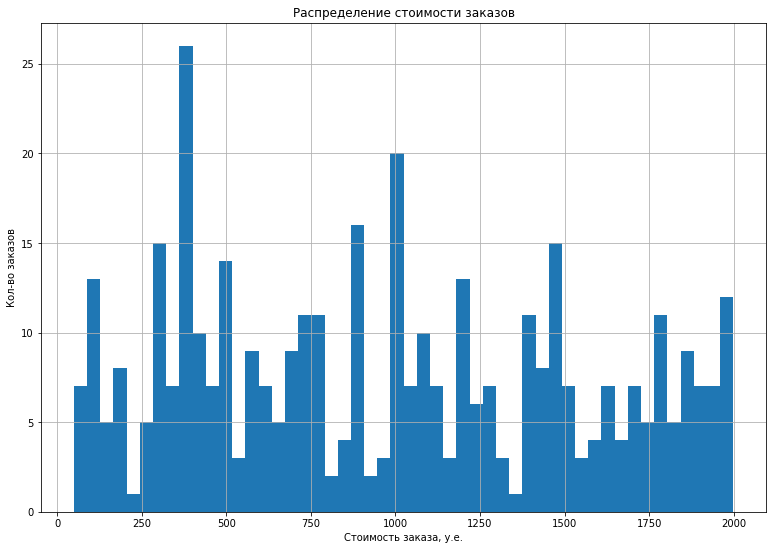

In [52]:
plt.figure(figsize=(13, 9))

orders.query('revenue < 2000')['revenue'].plot(kind='hist', bins=50)

plt.title('Распределение стоимости заказов')
plt.xlabel('Стоимость заказа, y.e.')
plt.ylabel('Кол-во заказов')
plt.grid(True)
plt.show()

Рассчитаем 1-ий и 5-ий перцентили

In [53]:
print(np.percentile(orders['revenue'], [1, 5]))

[100. 300.]


В качестве нижней границы будем испоьзовать значение в 250 y.e., а верхней 30 000 y.e.

In [54]:
low_per = 250 # np.percentile(orders['revenue'], 5)
high_per = 30000 # np.percentile(orders['revenue'], 95)

Удалим все заказы дешевле/дороже указанных границ

In [55]:
filt_orders = orders.query('@low_per < revenue < @high_per')

Взглянем на оставшееся кол-во заказов

In [56]:
filt_orders.shape[0]

938

Сгруппируем заказы для группы A по дням для <code>filt_orders</code>

In [57]:
filt_ordersADaily = (
    filt_orders[filt_orders['group']=='A'][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
)
filt_ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

filt_ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,17,91327
2,2019-08-03,24,112473
3,2019-08-04,10,41066
4,2019-08-05,21,86293


И для группы B

In [58]:
filt_ordersBDaily = (
    filt_orders[filt_orders['group']=='B'][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
)
filt_ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

filt_ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,16,59586
1,2019-08-02,20,93134
2,2019-08-03,14,67049
3,2019-08-04,13,65540
4,2019-08-05,20,89833


Осталось определить кумулятивные кол-во заказов и выручку для групп A и B

In [59]:
filt_ordersACummulative = filt_ordersADaily.apply(
    lambda x: filt_ordersADaily[filt_ordersADaily['date'] <= x['date']].agg(
        {
            'date' : 'max',
            'ordersPerDateA' : 'sum',
            'revenuePerDateA' : 'sum'
        }), axis=1
).sort_values(by=['date'])
filt_ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

filt_ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,40,234106
2,2019-08-03,64,346579
3,2019-08-04,74,387645
4,2019-08-05,95,473938


In [60]:
filt_ordersBCummulative = filt_ordersBDaily.apply(
    lambda x: filt_ordersBDaily[filt_ordersBDaily['date'] <= x['date']].agg(
        {
            'date' : 'max',
            'ordersPerDateB' : 'sum',
            'revenuePerDateB' : 'sum'
        }), axis=1
).sort_values(by=['date'])
filt_ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

filt_ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,16,59586
1,2019-08-02,36,152720
2,2019-08-03,50,219769
3,2019-08-04,63,285309
4,2019-08-05,83,375142


Объединим полученные таблицы в <code>filt_data</code>

In [61]:
filt_data = (
    filt_ordersADaily.merge(filt_ordersBDaily, on='date', how='left')
    .merge(filt_ordersACummulative, on='date', how='left')
    .merge(filt_ordersBCummulative, on='date', how='left')
)

filt_data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,23,142779,16,59586,23,142779,16,59586
1,2019-08-02,17,91327,20,93134,40,234106,36,152720
2,2019-08-03,24,112473,14,67049,64,346579,50,219769
3,2019-08-04,10,41066,13,65540,74,387645,63,285309
4,2019-08-05,21,86293,20,89833,95,473938,83,375142


В разрезе отфильтрованных данных интересно взглянуть на кумулятивные выручку и средний чек

Построим график кумулятивной выручки для <code>filt_data</code>

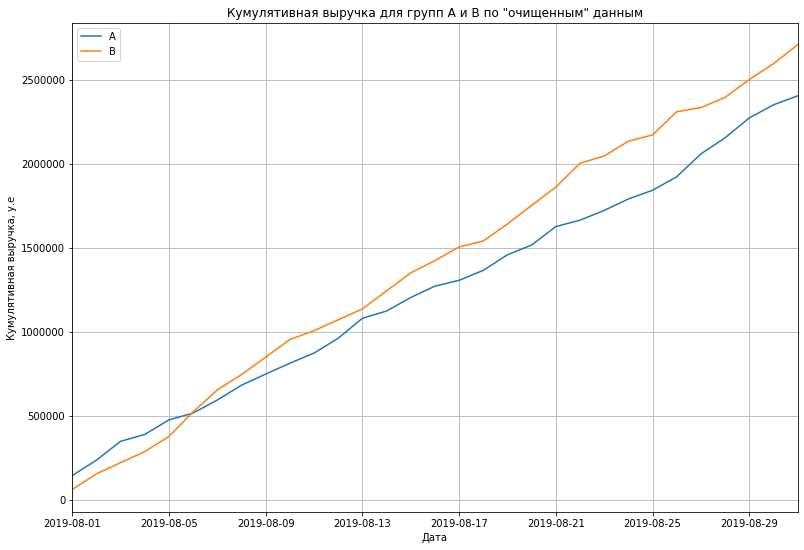

In [62]:
line_graph_func(
    filt_data['date'],
    {'A':filt_data['revenueCummulativeA'], 'B':filt_data['revenueCummulativeB']},
    'Кумулятивная выручка для групп A и B по "очищенным" данным',
    'Дата',
    'Кумулятивная выручка, у.е'
)

**Выводы**

* Кумулятивная выручка группы B стабильно выше выручки группы A, начиная с 06.08.2019

Построим график кумулятивного среднего чека по группам для <code>filt_data</code>

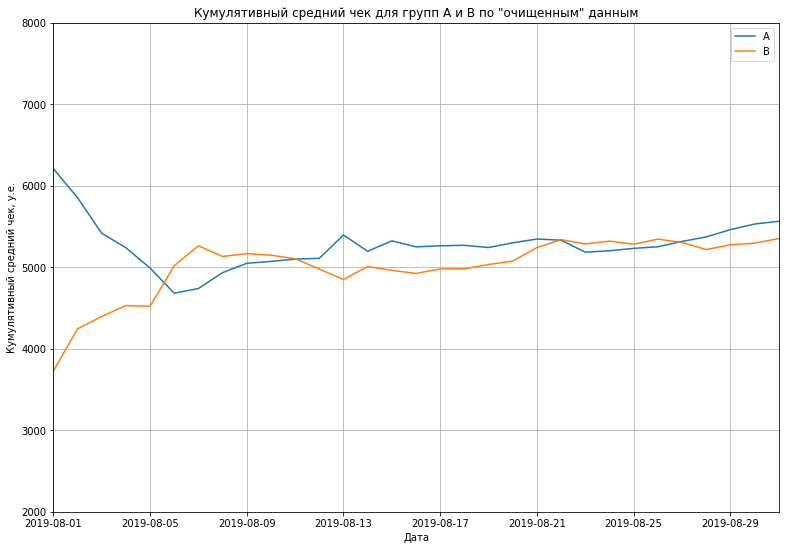

In [63]:
line_graph_func(
    filt_data['date'],
    {'A':filt_data['revenueCummulativeA']/filt_data['ordersCummulativeA'], 'B':filt_data['revenueCummulativeB']/filt_data['ordersCummulativeB']},
    'Кумулятивный средний чек для групп A и B по "очищенным" данным',
    'Дата',
    'Кумулятивный средний чек, у.е.',
    ylim=(2000, 8000)
)

**Выводы**

* Кумулятивный средний чек по "очищенным" данным практически установился к моменту окончания теста
* "Дорогие" заказы влияли не только на группу B, но и на группу A - для "очищенных" данных результат среднего чека для двух групп в конце анализируемого периода составляет около 5 500 y.e.
* Больших различий в среднем чеке между группами не наблюдается. Стат значимость различий будет определена ниже

Проверим выборки средних чеков на нормальность

In [64]:
sample_A = filt_data['revenuePerDateA'] / filt_data['ordersPerDateA']
sample_B = filt_data['revenuePerDateB'] / filt_data['ordersPerDateB']

test_norm_func(
    {'A':sample_A, 'B':sample_B}
)

Результаты группы A
p-value: 0.8373060822486877
Не получилось отвергнуть нулевую гипотезу: распределение нормально
Результаты группы B
p-value: 0.01611233688890934
Отвергаем нулевую гипотезу: распределение НЕ нормально


Т.к. распределение группы B осталось распределенным не нормально, то для проверки гипотезы используем непараметрический тест Уилкоксона-Манна-Уитни

In [65]:
results = st.mannwhitneyu(sample_A, sample_B)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: средние чеки групп A и B по 'очищенным' данным различаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средние чеки групп A и B по 'очищенным' данным не имеют статистически значимых различий")

p-value: 0.13607413906469257
Не получилось отвергнуть нулевую гипотезу: средние чеки групп A и B по 'очищенным' данным не имеют статистически значимых различий


**Выводы**

* В результате очистки выборка группы A стала "нормальной", а выборка группы B нет
* В результате проверки нулевой гипотезы о равенстве средних чеков по "очищенным" данным 0-ая гипотеза была подтверждена: средние чеки групп A и B не имеют статистически значимых различий

<hr style="height: 2px">

*P.S. Интересное замечание: если не отсекать "дешевые" заказы, то обе выборки станут нормально распределенными. Тогда гипотезу можно проверить с помощью т-теста для зависимых (парных) выборок, однако средние чеки групп A и B также не будут иметь статистически значимых различий*

In [66]:
# фильтруем заказы по верхней границе
filt_orders = orders.query('revenue < @high_per')

# получаем кол-во дневных заказов и выручку группы A по filt_orders
filt_ordersADaily = (
    filt_orders[filt_orders['group']=='A'][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
)
filt_ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# получаем кол-во дневных заказов и выручку группы B по filt_orders
filt_ordersBDaily = (
    filt_orders[filt_orders['group']=='B'][['date', 'transactionId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
)
filt_ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# объединяем 2 таблицы
filt_data = filt_ordersADaily.merge(filt_ordersBDaily, on='date')

filt_data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB
0,2019-08-01,23,142779,17,59758
1,2019-08-02,19,91602,21,93234
2,2019-08-03,24,112473,14,67049
3,2019-08-04,11,41176,13,65540
4,2019-08-05,22,86383,21,89908


Проверим выборки на нормальность

In [67]:
sample_A = filt_data['revenuePerDateA'] / filt_data['ordersPerDateA']
sample_B = filt_data['revenuePerDateB'] / filt_data['ordersPerDateB']

test_norm_func(
    {'A':sample_A, 'B':sample_B}
)

Результаты группы A
p-value: 0.5253589749336243
Не получилось отвергнуть нулевую гипотезу: распределение нормально
Результаты группы B
p-value: 0.24516934156417847
Не получилось отвергнуть нулевую гипотезу: распределение нормально


Оба распределения нормальны. В кач-ве теста будем использовать параметрический т-тест для зависимых (парных) выборок

In [68]:
results = st.ttest_rel(sample_A, sample_B)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: средние чеки групп A и B по 'очищенным' данным различаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средние чеки групп A и B по 'очищенным' данным не имеют статистически значимых различий")

p-значение:  0.42606098116795876
Не получилось отвергнуть нулевую гипотезу: средние чеки групп A и B по 'очищенным' данным не имеют статистически значимых различий


**Вывод**

* Средние чеки исследуемых групп по "очищенным" данным не имеют статистически значимых различий

<hr style="height: 2px">

## Выводы. Принятие решения по результатам теста <a id="conclusions"></a>

В результате проведения A/B теста имеем следующие результаты:

* Кумулятивная выручка по "очищенным" данным установилась для 2ух групп и стабильно выше для группы B
* Кумулятивный средний чек по "очищенным" данным установился и не имеет выраженных различий для анализируемых групп
* Кумулятивная конверсия установилась для 2ух групп, конверсия для группы B стабильно выше конверсии группы A


* Разница между средними чеками 2ух групп по "сырым" и "очищенным" данным не имеет стат. значимости: вероятнее всего, средние чеки анализируемых групп равны
* Разница между конверсиями 2ух групп по "сырым" данным имеет статистическую значимость: вероятнее всего, конверсия группы B выше конверсии группы A

В результате теста все исследуемые метрики (после изучения и удаления "аномалий") установились, что позволяет **остановить тест**.

**"Победа" может быть присуждена группе B**: вероятнее всего конверсия для нее выше, чем для группы A. При этом показатели средних чеков у исследуемых групп, скорее всего, равны. Как следствие - для группы B выручка стабильно выше, чем для группы A. Для оценки конверсий будем использовать данные последней недели теста:

In [69]:
conv_data = data.query('date > "2019-08-24"')

convA = round(((conv_data['ordersCummulativeA'] / conv_data['visitorsCummulativeA']) * 100).mean(), 3)
convB = round(((conv_data['ordersCummulativeB'] / conv_data['visitorsCummulativeB']) * 100).mean(), 3)

print('Средняя установившаяся конверсия группы A:', convA)
print('Средняя установившаяся конверсия группы B:', convB)

Средняя установившаяся конверсия группы A: 2.544
Средняя установившаяся конверсия группы B: 2.896
